## Rationale
Visualizing data in plots is fundamental to the process of exploring data, and Pandas includes several convenient visualization methods. These methods are built by connecting to Matplotlib, the standard Python plotting module. It's important to note that Pandas does not itself do the plotting and visualization, but rather depends another module to do so. When building more complex visualizations or ones to be used in a presentation you will likely want to use Matplotlib directly, or a different plotting module such as Bokeh, Plotly, YellowBrick, or Seaborn (many of which also use matplotlib as a dependency). Matplotlib will be taught and used extensively throughout the DSI. A primary benefit of using Pandas for visualization is that it reduces the overhead for producing exploratory plots quickly. This is especially useful for Exploratory Data Analysis (EDA for short).


## Basic plotting
Both Series and DataFrames have .plot() methods on them. By default, a call to this method generates a line plot against the index (or a line for each column of a DataFrame). For example:

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame(np.random.randn(100, 2), columns=['A','B'])

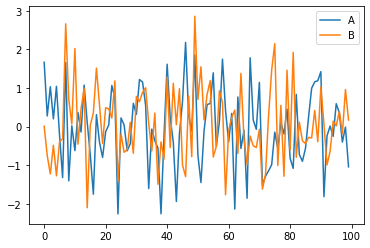

In [47]:
df.plot();

Calling .plot() here returns a Matplotlib axes object. In order to do something, like show the plot on screen or save it to a file, you need to import Matplotlib. The standard way of doing so is:



In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
plt.show()

Calling plt.show() renders the Matplotlib object as an on-screen image. If you are working in a Jupyter Notebook, it can be convenient to run %matplotlib inline along with your imports to have plots rendered directly in the notebook, rather than in a new window. A call to plt.savefig() allows you to save your plot to disk. Here is an example of a plot generated with the above code:



The .plot() method accepts a large number of keywords to customize how the data in the Series/DataFrame are displayed. Of particular note is kind=. As seen above, kind = 'line' is the default, but several other kinds of plots are available, including scatter, bar, and histogram.

It is very common to want to examine the relation between data in two columns of the DataFrame with each other; you can do so with:

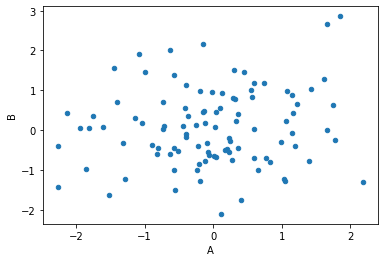

In [46]:
 df.plot(x = 'A', y = 'B', kind = 'scatter');

where the x and y keywords simply specify which column should be plotted along which axis.



## Plotting distributions
Visualizing distributions is a particularly important part of exploratory data analysis (EDA), and Pandas includes several ways of doing so. Histograms are available in the .plot() method:

<AxesSubplot:ylabel='Frequency'>

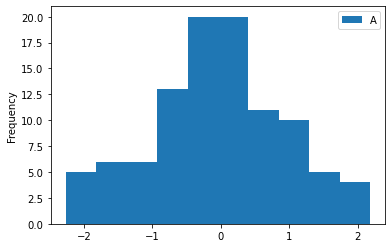

In [50]:
df.plot(y = 'A', kind = 'hist')

When working with histograms it's always important to think about how the number of bins to split your data into affects the resulting plot. By default ten bins are used, but this number can be adjusted with the bins= keyword.

Other distribution visualizations to consider examining are box plots and kernel density estimation, specified as kind='box' and 'kde' respectively.

## Advanced plotting
Pandas has a few more advanced tools available in its plotting module. One to be aware of is scatter_matrix:

In [51]:
df['C'] = df['A'] + df['B'] # add a new column for some variety.

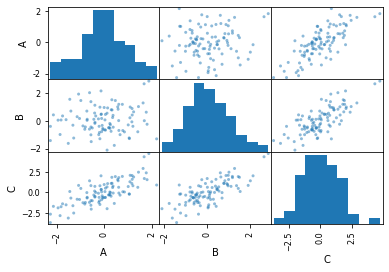

In [53]:
pd.plotting.scatter_matrix(df);

This utility generates an n×n "matrix" of scatterplots, where n is the number of numerical columns in the DataFrame. With scatter_matrix you can quickly examine each pair of features for correlations/dependencies on each other. Along the diagonal of the "matrix" rather than showing a scatter plot of a column with itself (which wouldn't be informative), it shows that column's distribution as a histogram.

Using box plots is good way to do a rough comparison of distributions, and the simplest way to specify which columns to compare (without getting a warning) is to select those columns before calling .plot():

<AxesSubplot:>

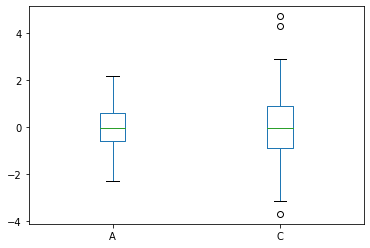

In [54]:
df[['A', 'C']].plot(kind = 'box')